In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

from kennard_stone import train_test_split

In [2]:
X: pd.DataFrame
y: pd.Series
X, y = load_iris(as_frame=True, return_X_y=True)
display(X.head(), y.to_frame().head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,target
0,0
1,0
2,0
3,0
4,0


In [3]:
X_train_euc, X_test_euc, y_train_euc, y_test_euc = train_test_split(
    X, y, test_size=0.2, n_jobs=-1, metric="euclidean"
)

2024-11-18 22:15:59,467 - kennard_stone.utils._pairwise:109[INFO] - Calculating pairwise distances using scikit-learn.

2024-11-18 22:15:59,604 - kennard_stone.utils._pairwise:109[INFO] - Calculating pairwise distances using scikit-learn.



In [4]:
X_train_mah, X_test_mah, y_train_mah, y_test_mah = train_test_split(
    X, y, test_size=0.2, n_jobs=-1, metric="mahalanobis"
)

2024-11-18 22:15:59,650 - kennard_stone.utils._pairwise:109[INFO] - Calculating pairwise distances using scikit-learn.

2024-11-18 22:15:59,657 - kennard_stone.utils._pairwise:109[INFO] - Calculating pairwise distances using scikit-learn.



<AxesSubplot:>

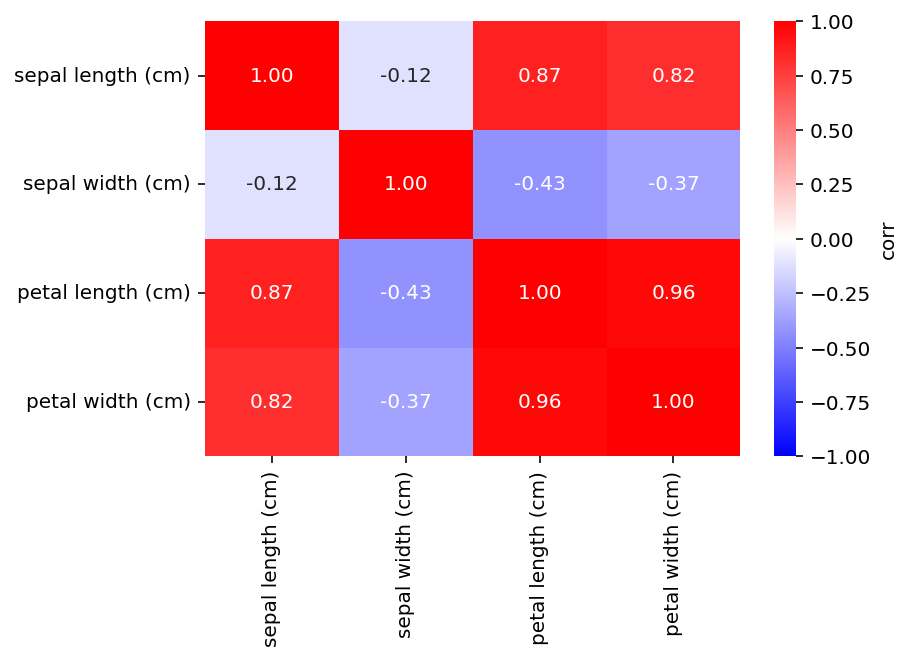

In [5]:
fig, ax = plt.subplots(dpi=144)
sns.heatmap(
    X.corr(),
    vmax=1,
    vmin=-1,
    cbar_kws=dict(label="corr"),
    cmap="bwr",
    annot=True,
    fmt=".2f",
    ax=ax,
)

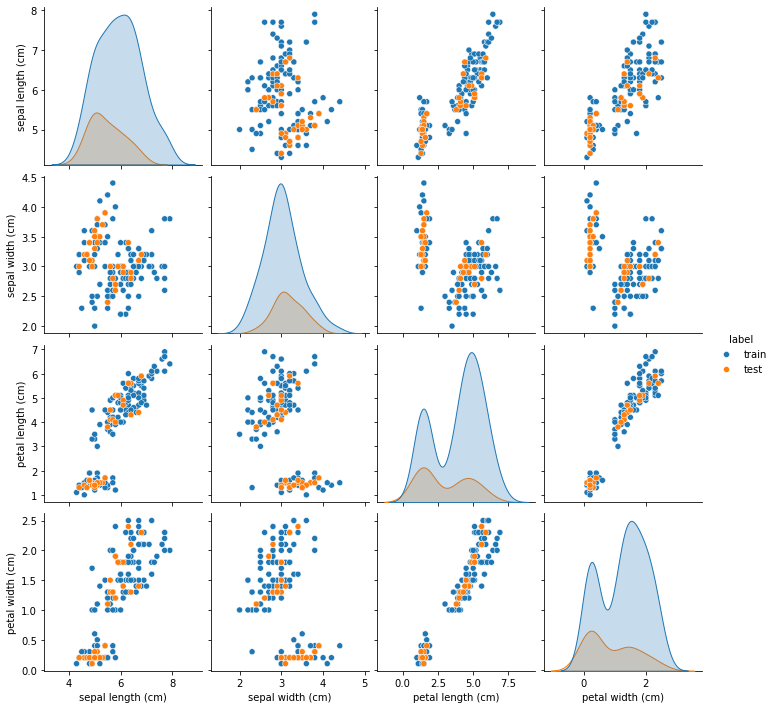

In [8]:
sns.pairplot(
    pd.concat(
        (
            pd.concat(
                (
                    X_train_euc,
                    pd.Series(
                        ("train",) * X_train_euc.shape[0],
                        name="label",
                        index=X_train_euc.index,
                    ),
                ),
                axis=1,
            ),
            pd.concat(
                (
                    X_test_euc,
                    pd.Series(
                        ("test",) * X_test_euc.shape[0],
                        name="label",
                        index=X_test_euc.index,
                    ),
                ),
                axis=1,
            ),
        ),
        axis=0,
    ),
    hue="label",
)

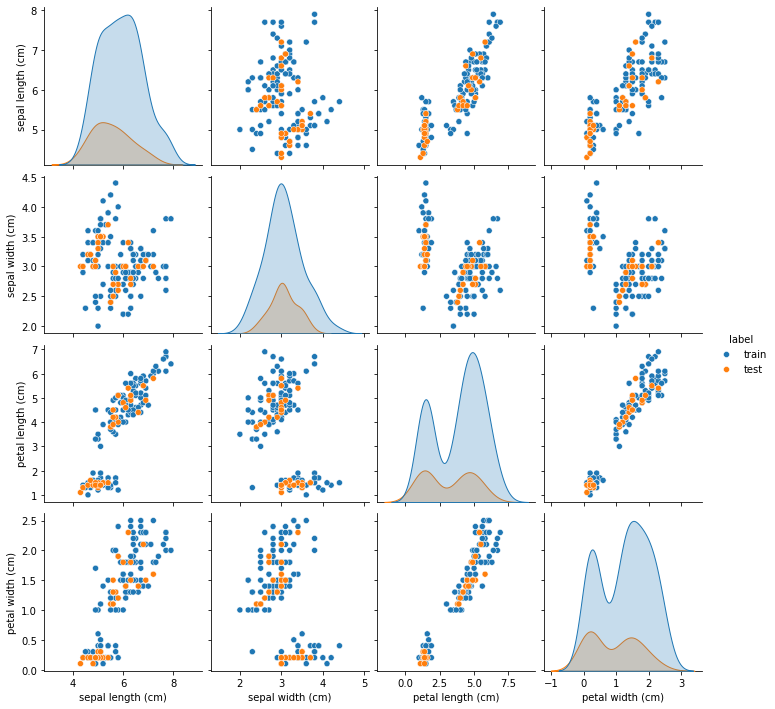

In [ ]:
sns.pairplot(
    pd.concat(
        (
            pd.concat(
                (
                    X_train_mah,
                    pd.Series(
                        ("train",) * X_train_mah.shape[0],
                        name="label",
                        index=X_train_mah.index,
                    ),
                ),
                axis=1,
            ),
            pd.concat(
                (
                    X_test_mah,
                    pd.Series(
                        ("test",) * X_test_mah.shape[0],
                        name="label",
                        index=X_test_mah.index,
                    ),
                ),
                axis=1,
            ),
        ),
        axis=0,
    ),
    hue="label",
)